## Regressão Logística com o R

Olá! 

Para começarmos a regressão logística, precisaremos destas seguintes bibliotecas no R. Caso não tenha alguma delas, poderá inserir o código `install.packages("packagename")`. 

In [143]:
#Aqui já carregaremos todas as bibliotecas que usaremos nesse exercício de R 
library(XML)
library(titanic) 
library(aod)
library(ggplot2)
library(corrplot)
library(caret)
library(ROCR)

#Vamos pegar a nossa dataset
df <-read.csv("https://raw.githubusercontent.com/guislinden/Logistic_Regression/master/Data_train_reduced.csv", sep = ",")
#com essa função, poderemos ver o cabeçalho dos nossos dados para entender o que ele é e como ele está estruturado. 
head(data)

Respondent.ID,Product.ID,Product,q1_1.personal.opinion.of.this.Deodorant,q2_all.words,q3_1.strength.of.the.Deodorant,q4_1.artificial.chemical,q4_2.attractive,q4_3.bold,q4_4.boring,...,ValSegb,s7.involved.in.the.selection.of.the.cosmetic.products,s8.ethnic.background,s9.education,s10.income,s11.marital.status,s12.working.status,s13.2,s13a.b.most.often,s13b.bottles.of.Deodorant.do.you.currently.own
4300,121,Deodorant B,7,2,3,3,1,4,2,...,7,4,2,3,2,2,1,0,0,4
4301,121,Deodorant B,6,0,3,2,4,2,1,...,1,4,1,4,4,1,1,0,0,1
4302,121,Deodorant B,6,1,3,3,5,3,3,...,6,4,1,3,3,1,1,0,0,6
4303,121,Deodorant B,5,1,5,3,4,5,2,...,2,4,2,3,10,1,1,0,0,4
4304,121,Deodorant B,6,2,3,2,4,3,1,...,5,4,1,2,3,3,1,0,0,4
4305,121,Deodorant B,7,4,3,2,4,4,2,...,2,4,2,3,2,2,1,0,0,1


#### Contexto
Dados que uma pesquisa de demanda para uma perfumaria, onde foi apontado diversas perguntas e dados no contexto de ver se um indivíduo gostava ou não instantaneamente de um perfume, o que aumentava drasticamente suas chances de adquiri-lo. 

#### Conteúdo 
##### Variável Dependente
- Instant Liking

##### Variáveis Independentes 
- ID do respondente 
- ID do produto
- 
- 
- 

#### Objetivo
Visualizar quais as principais variáveis para que um indivíduo possa vir a admirar o perfume instantaneamente, utilizando Regressão Logística. 

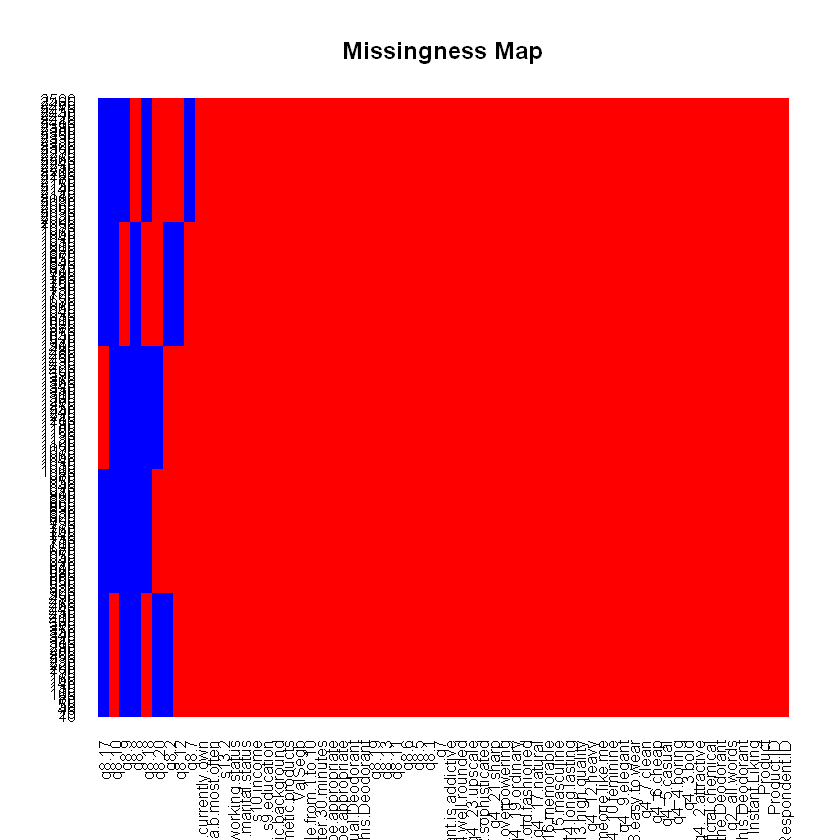

In [114]:
#Aqui vamos visualizar valores que podem estar faltando
library(Amelia)
library(mlbench)
missmap(df, col=c("blue", "red"), legend=FALSE)


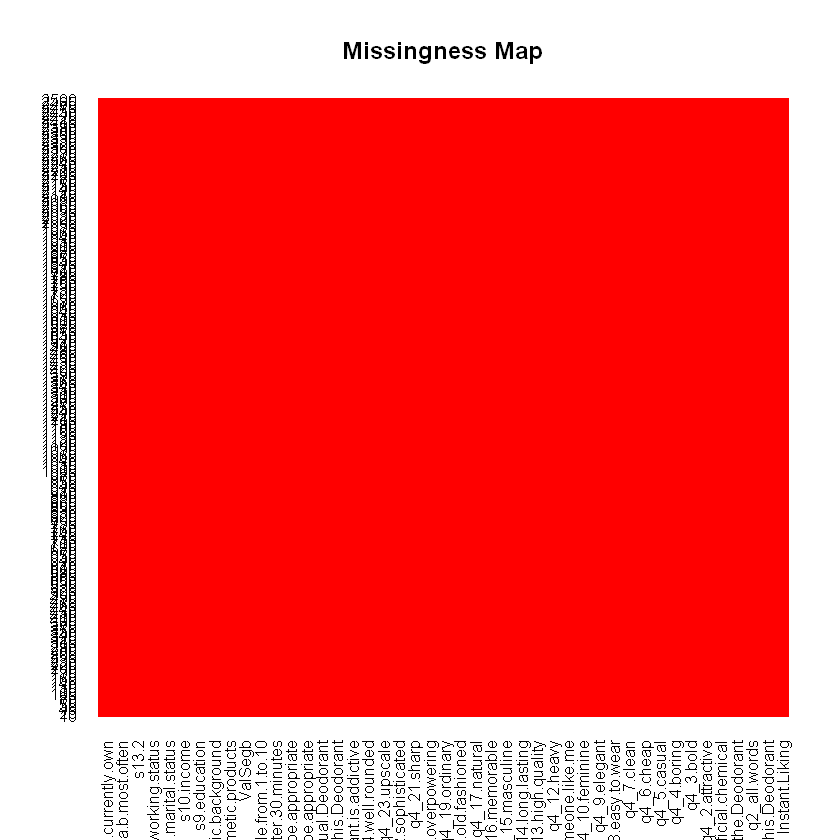

In [174]:
#Vamos remover as variáveis desnecessárias
df2<-df
df2$Respondent.ID <- NULL
df2$Product.ID <- NULL
df2$Product <- NULL
df2$q7  <- NULL
df2$q8.1  <- NULL
df2$q8.2  <- NULL
df2$q8.5  <- NULL
df2$q8.6  <- NULL
df2$q8.7  <- NULL
df2$q8.8  <- NULL
df2$q8.9  <- NULL
df2$q8.10  <- NULL
df2$q8.11 <- NULL
df2$q8.12  <- NULL
df2$q8.13  <- NULL
df2$q8.17  <- NULL
df2$q8.18  <- NULL
df2$q8.19  <- NULL
df2$q8.20  <- NULL
df2$q8.1  <- NULL

#E visualizar como está nosso mapa de valores faltando
missmap(df2, col=c("blue", "red"), legend=FALSE)


In [179]:
#Vamos dividir entre variáveis dependentes e variáveis indepentendes
train <- df2[1:1500,]
test <- df2[1501:2500,]

In [180]:
model <- glm(Instant.Liking ~.,family=binomial(link='logit'),data=train)


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

In [181]:
summary(model)


Call:
glm(formula = Instant.Liking ~ ., family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-1.330e-05  -6.662e-06  -2.110e-08   2.110e-08   1.422e-05  

Coefficients: (1 not defined because of singularities)
                                                          Estimate Std. Error
(Intercept)                                              2.149e+02  7.926e+04
q1_1.personal.opinion.of.this.Deodorant                 -4.767e+01  7.776e+03
q2_all.words                                             1.556e-02  4.227e+03
q3_1.strength.of.the.Deodorant                           8.236e-04  5.403e+03
q4_1.artificial.chemical                                 3.201e-02  2.885e+03
q4_2.attractive                                          3.326e-02  3.175e+03
q4_3.bold                                                1.699e-02  3.213e+03
q4_4.boring                                             -5.110e-02  3.448e+03
q4_